### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [99]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [100]:
# Display data
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [101]:
purchase_data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

In [102]:
purchase_data.count()

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

## Player Count

* Display the total number of players


In [103]:
# Creates variable tot_players to store the length of new list from df 'SN'
tot_players = purchase_data['SN'].nunique()
tot_players

576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [104]:
# Number of Purchases	Total Revenue

num_unique_items = purchase_data['Item ID'].nunique()
num_unique_items

183

In [105]:
avg_price = purchase_data['Price'].mean()
avg_price

3.050987179487176

In [106]:
num_purchases = purchase_data['Purchase ID'].count()
num_purchases

780

In [107]:
tot_revenue = purchase_data['Price'].sum()
tot_revenue

2379.77

In [108]:
# Data Frame Summary
summary_df = pd.DataFrame({'Number of Unique Items': [num_unique_items],
                           'Average Price': [avg_price],
                           'Number of Purchases': [num_purchases],
                           'Total Revenue': [tot_revenue]})
summary_df.head()

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,3.050987,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [109]:
grouped_df = purchase_data.groupby('Gender')

In [110]:
count_gender = grouped_df['SN'].nunique()
perc_gender = round((count_gender/tot_players),2)

In [111]:
perc_gender_df = pd.DataFrame({'Total Count': count_gender,
                              'Percentage of Total:': perc_gender})
perc_gender_df.head()

,Total Count,Percentage of Total:
Gender,,
Female,81,0.14
Male,484,0.84
Other / Non-Disclosed,11,0.02


In [112]:
# Display data
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [113]:
# Purchase Count	Average Purchase Price	Total Purchase Value	Avg Total Purchase per Person
purchase_count = grouped_df['Purchase ID'].count()
purchase_count

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64

In [114]:
avg_purchase_price = grouped_df['Price'].mean()
avg_purchase_price

Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64

In [115]:
tot_purchase_price = grouped_df['Price'].sum()
tot_purchase_price

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [116]:
avg_per_person = tot_purchase_price / count_gender

In [117]:
summary_purchasing_analysis_df = pd.DataFrame({'Purchase Count': purchase_count,
                                               'Average Purchase Price': avg_purchase_price,
                                               'Total Purchase Value': tot_purchase_price,
                                               'Avg Total Purchase per Person': avg_per_person})
summary_purchasing_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,3.203009,361.94,4.468395
Male,652,3.017853,1967.64,4.065372
Other / Non-Disclosed,15,3.346000,50.19,4.562727


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [118]:
# # Create bins which are a list

bins = [0,9,14,19,24,29,34,39,1000]
bin_labels = ['<10',
             '10-14',
             '15-19',
             '20-24',
             '25-29',
             '30-34',
             '35-39',
             '40+']

purchase_data["Age Demographics"] = pd.cut(purchase_data["Age"],bins, labels=bin_labels)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Demographics
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24


In [119]:
group_age = purchase_data.groupby('Age Demographics')

In [120]:
group_age_unique = group_age['SN'].nunique()
group_age_unique.head()

Age Demographics
<10       17
10-14     22
15-19    107
20-24    258
25-29     77
Name: SN, dtype: int64

In [121]:
perc_players = group_age_unique / tot_players

In [122]:
# Creat Summary Data Frame of Total Count Age and Percentage of Players
summary_age_demo = pd.DataFrame({'Total Count': group_age_unique,
                                'Percentage of Total Players': (perc_players)})
summary_age_demo.head(10)

,Total Count,Percentage of Total Players
Age Demographics,,
<10,17,0.029514
10-14,22,0.038194
15-19,107,0.185764
20-24,258,0.447917
25-29,77,0.133681
30-34,52,0.090278
35-39,31,0.053819
40+,12,0.020833


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [123]:
grouped_purchase_data = purchase_data.groupby(['Age Demographics'])
grouped_purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Demographics
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24
5,5,Yalae81,22,Male,81,Dreamkiss,3.61,20-24
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18,35-39
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58,35-39
14,14,Saesrideu94,35,Male,165,Bone Crushing Silver Skewer,4.86,35-39
19,19,Chamalo71,30,Male,89,"Blazefury, Protector of Delusions",4.64,30-34


In [124]:
purchase_count_age = grouped_purchase_data['Purchase ID'].count()
purchase_count_age

Age Demographics
<10       23
10-14     28
15-19    136
20-24    365
25-29    101
30-34     73
35-39     41
40+       13
Name: Purchase ID, dtype: int64

In [125]:
avg_purchase_price_age = grouped_purchase_data['Price'].mean()
avg_purchase_price_age

Age Demographics
<10      3.353478
10-14    2.956429
15-19    3.035956
20-24    3.052219
25-29    2.900990
30-34    2.931507
35-39    3.601707
40+      2.941538
Name: Price, dtype: float64

In [126]:
avg_tot_per_person_age = purchase_data['Price'].sum() / purchase_count_age
avg_tot_per_person_age

Age Demographics
<10      103.468261
10-14     84.991786
15-19     17.498309
20-24      6.519918
25-29     23.562079
30-34     32.599589
35-39     58.043171
40+      183.059231
Name: Purchase ID, dtype: float64

In [127]:
tot_purchase_age = grouped_purchase_data['Price'].sum()
tot_purchase_age

Age Demographics
<10        77.13
10-14      82.78
15-19     412.89
20-24    1114.06
25-29     293.00
30-34     214.00
35-39     147.67
40+        38.24
Name: Price, dtype: float64

In [128]:
avg_purchase_age = avg_tot_per_person_age / purchase_count_age
avg_purchase_age

Age Demographics
<10       4.498620
10-14     3.035421
15-19     0.128664
20-24     0.017863
25-29     0.233288
30-34     0.446570
35-39     1.415687
40+      14.081479
Name: Purchase ID, dtype: float64

In [129]:
# Purchase Count	Average Purchase Price	Total Purchase Value	Avg Total Purchase per Person
summary_purchasing_analysis_age = pd.DataFrame({'Purchase Count': purchase_count_age,
                                               'Average Purchase Price': avg_purchase_price_age,
                                                'Total Purchase Value': tot_purchase_age,
                                               'Average Purchase Per Person': avg_purchase_age})

summary_purchasing_analysis_age

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Purchase Per Person
Age Demographics,,,,
<10,23,3.353478,77.13,4.498620
10-14,28,2.956429,82.78,3.035421
15-19,136,3.035956,412.89,0.128664
20-24,365,3.052219,1114.06,0.017863
25-29,101,2.900990,293.00,0.233288
30-34,73,2.931507,214.00,0.446570
35-39,41,3.601707,147.67,1.415687
40+,13,2.941538,38.24,14.081479


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [130]:
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Demographics
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24
...,...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54,20-24
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63,20-24
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46,20-24
778,778,Sisur91,7,Male,101,Final Critic,4.19,<10


In [131]:
# Group by SN to get the appropriate index
df_top = purchase_data.groupby(['SN'])

In [132]:
top_purchase_count = df_top['Purchase ID'].count()
top_purchase_count

SN
Adairialis76     1
Adastirin33      1
Aeda94           1
Aela59           1
Aelaria33        1
                ..
Yathecal82       3
Yathedeu43       2
Yoishirrala98    1
Zhisrisu83       2
Zontibe81        3
Name: Purchase ID, Length: 576, dtype: int64

In [133]:
top_purchase_spend = df_top['Price'].sum()
top_purchase_spend

SN
Adairialis76     2.28
Adastirin33      4.48
Aeda94           4.91
Aela59           4.32
Aelaria33        1.79
                 ... 
Yathecal82       6.22
Yathedeu43       6.02
Yoishirrala98    4.58
Zhisrisu83       7.89
Zontibe81        8.03
Name: Price, Length: 576, dtype: float64

In [134]:
top_avg_spend = df_top['Price'].mean()
top_avg_spend

SN
Adairialis76     2.280000
Adastirin33      4.480000
Aeda94           4.910000
Aela59           4.320000
Aelaria33        1.790000
                   ...   
Yathecal82       2.073333
Yathedeu43       3.010000
Yoishirrala98    4.580000
Zhisrisu83       3.945000
Zontibe81        2.676667
Name: Price, Length: 576, dtype: float64

In [135]:
summary_df_top = pd.DataFrame({'Purchase Count': top_purchase_count,
                               'Average Purchase Price': top_avg_spend,
                               'Total Purchase Value': top_purchase_spend})
summary_df_top

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Adairialis76,1,2.280000,2.28
Adastirin33,1,4.480000,4.48
Aeda94,1,4.910000,4.91
Aela59,1,4.320000,4.32
Aelaria33,1,1.790000,1.79
...,...,...,...
Yathecal82,3,2.073333,6.22
Yathedeu43,2,3.010000,6.02
Yoishirrala98,1,4.580000,4.58


In [136]:
summary_df_top.sort_values('Total Purchase Value',ascending=False).head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [137]:
df_most_pop = purchase_data[['Item ID','Item Name','Price']]
df_most_pop.head()

,Item ID,Item Name,Price
0,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,143,Frenzied Scimitar,1.56
2,92,Final Critic,4.88
3,100,Blindscythe,3.27
4,131,Fury,1.44


In [138]:
group_most_pop = df_most_pop.groupby(['Item ID', 'Item Name'])

In [139]:
purchase_count_mp = group_most_pop['Item Name'].count()
purchase_count_mp

Item ID  Item Name                      
0        Splinter                           4
1        Crucifer                           3
2        Verdict                            6
3        Phantomlight                       6
4        Bloodlord's Fetish                 5
                                           ..
179      Wolf, Promise of the Moonwalker    6
180      Stormcaller                        1
181      Reaper's Toll                      5
182      Toothpick                          3
183      Dragon's Greatsword                3
Name: Item Name, Length: 183, dtype: int64

In [140]:
avg_purchase_price_mp = group_most_pop['Price'].mean()
avg_purchase_price_mp

Item ID  Item Name                      
0        Splinter                           1.28
1        Crucifer                           3.26
2        Verdict                            2.48
3        Phantomlight                       2.49
4        Bloodlord's Fetish                 1.70
                                            ... 
179      Wolf, Promise of the Moonwalker    4.48
180      Stormcaller                        3.36
181      Reaper's Toll                      1.66
182      Toothpick                          4.03
183      Dragon's Greatsword                1.09
Name: Price, Length: 183, dtype: float64

In [141]:
tot_purchase_mp = purchase_count_mp * avg_purchase_price_mp
tot_purchase_mp

Item ID  Item Name                      
0        Splinter                            5.12
1        Crucifer                            9.78
2        Verdict                            14.88
3        Phantomlight                       14.94
4        Bloodlord's Fetish                  8.50
                                            ...  
179      Wolf, Promise of the Moonwalker    26.88
180      Stormcaller                         3.36
181      Reaper's Toll                       8.30
182      Toothpick                          12.09
183      Dragon's Greatsword                 3.27
Length: 183, dtype: float64

In [142]:
most_pop_name = df_most_pop['Item Name']
most_pop_name

0      Extraction, Quickblade Of Trembling Hands
1                              Frenzied Scimitar
2                                   Final Critic
3                                    Blindscythe
4                                           Fury
                         ...                    
775                                         Wolf
776                             Exiled Doomblade
777        Celeste, Incarnation of the Corrupted
778                                 Final Critic
779                                         Dawn
Name: Item Name, Length: 780, dtype: object

In [143]:
df_summary_top_items = pd.DataFrame({'Purchase Count': purchase_count_mp,
                                     'Item Price': avg_purchase_price_mp,
                                     'Total Purchase Value': tot_purchase_mp})

In [144]:
df_summary_top_items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
0,Splinter,4,1.28,5.12
1,Crucifer,3,3.26,9.78
2,Verdict,6,2.48,14.88
3,Phantomlight,6,2.49,14.94
4,Bloodlord's Fetish,5,1.70,8.50


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [145]:
df_summary_top_items.sort_values('Total Purchase Value',ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


In [150]:
# Determine X and Y
x = summary_df_top['Purchase Count']
y = summary_df_top['Item Price']

KeyError: 'Item Price'

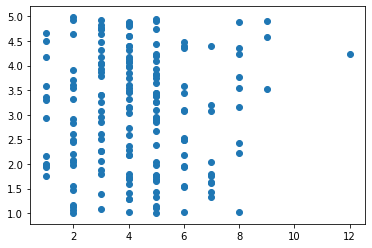

In [149]:
plt.scatter(x,y)